In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime

In [2]:
tickers = ['PG','^GSPC']
tickers_data = pd.DataFrame()
startdate = datetime(2013,7,1)
enddate = datetime(2023,7,1)
for i in tickers:
    tickers_data[i] = pdr.get_data_yahoo(i,start = startdate, end = enddate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


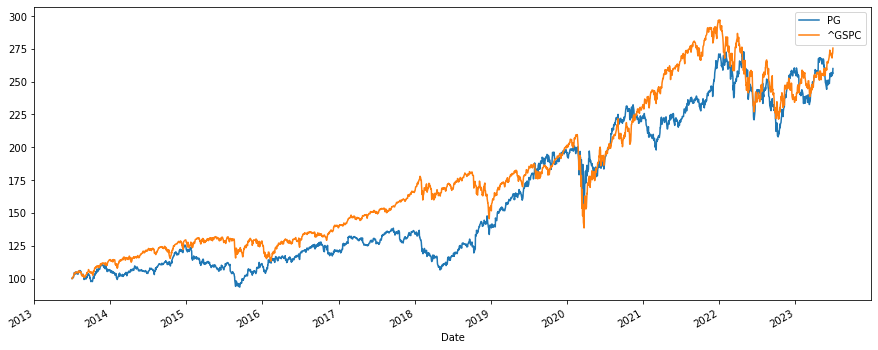

In [3]:
# Normalising and plotting the data:
((tickers_data/tickers_data.iloc[0])*100).plot(figsize=(15,6))
plt.show()

In [4]:
log_returns = np.log(tickers_data/tickers_data.shift(1))
log_returns.head()

,PG,^GSPC
Date,,
2013-07-01,NaN,NaN
2013-07-02,0.005369,-0.000545
2013-07-03,0.001656,0.000824
2013-07-05,-0.002931,0.010150
2013-07-08,0.005347,0.005238


In [5]:
log_returns.mean() * 250

PG       0.094906
^GSPC    0.100683
dtype: float64

In [6]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.032711,0.018064
^GSPC,0.018064,0.031227


In [7]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.565192
^GSPC,0.565192,1.000000


In [8]:
num_assets = len(tickers)
num_assets

2

In [9]:
weights = np.random.random(num_assets)
weights /= np.sum(weights) # To make the sum equal to 1
weights

array([0.43182867, 0.56817133])

In [10]:
# Expected portfolio return:
np.sum(weights * log_returns.mean()) * 250

0.09818850234651959

In [11]:
# Expected portfolio Variance:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.025044423955555464

In [12]:
# Expected portfolio Volatility:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.1582543015388696

### Performing this operation to understand what should be the weight of each stock, i.e. 1% of stock A and 99% of Stock B, and similarly we will compute 1000 combinations of it.

In [13]:

portfolio_return = []
portfolio_volatility = []

for i in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) # To make the sum equal to 1
    portfolio_return.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatility.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
portfolio_return = np.array(portfolio_return) # converting the list to np array
portfolio_volatility = np.array(portfolio_volatility)

portfolio_return,portfolio_volatility

(array([0.09773419, 0.09637533, 0.09911967, 0.100277  , 0.09636926,
        0.0992639 , 0.09675172, 0.09801195, 0.09799864, 0.09503917,
        0.09816933, 0.09817021, 0.10043193, 0.09810964, 0.09697986,
        0.09716011, 0.09732331, 0.09800472, 0.09620859, 0.09864536,
        0.09686597, 0.0955081 , 0.09822149, 0.09768255, 0.09889192,
        0.09951401, 0.09566548, 0.09803898, 0.09788321, 0.09830069,
        0.09844646, 0.09578568, 0.09883405, 0.10017843, 0.09669591,
        0.10010439, 0.09609524, 0.09932811, 0.09543033, 0.09877578,
        0.09604477, 0.0972372 , 0.09763466, 0.09791403, 0.09929073,
        0.0997172 , 0.09774725, 0.09583159, 0.09853785, 0.09695817,
        0.09717074, 0.097932  , 0.0970392 , 0.09816346, 0.09713746,
        0.09547057, 0.09791911, 0.09870089, 0.09865712, 0.09880702,
        0.09740679, 0.09933722, 0.09644105, 0.09623567, 0.09928319,
        0.09863328, 0.095441  , 0.10051738, 0.10031599, 0.09704611,
        0.09780616, 0.09762739, 0.095481  , 0.09

In [14]:
portfolios = pd.DataFrame({'Return': portfolio_return, 'Volatility': portfolio_volatility})
portfolios.head()

,Return,Volatility
0,0.097734,0.158224
1,0.096375,0.164498
2,0.099120,0.161675
3,0.100277,0.171793
4,0.096369,0.164547


<AxesSubplot:xlabel='Expected Volatility', ylabel='Expected Return'>

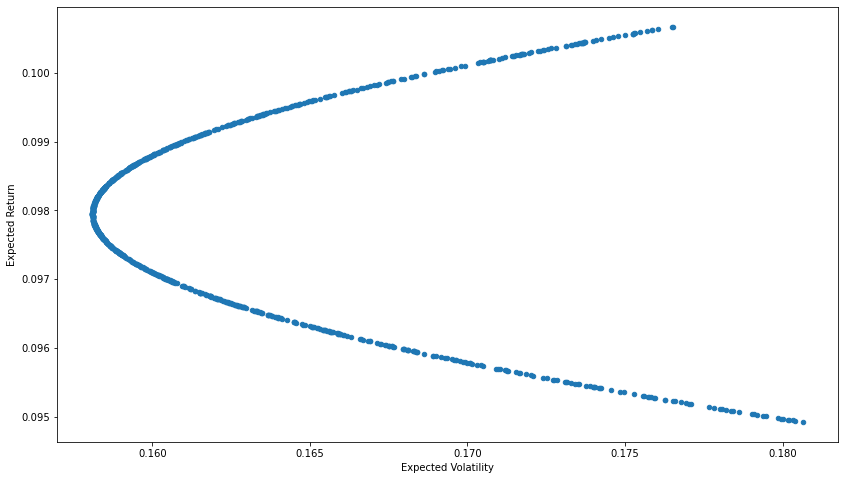

In [15]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter',
                figsize = (14,8), xlabel = 'Expected Volatility', ylabel = 'Expected Return')